# Recreating Figure 15

Ref.: (<https://quantum-journal.org/papers/q-2020-07-06-291/>)

In [1]:
import qiskit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
provider = qiskit.IBMQ.load_account()

In [3]:
backend = provider.backend.ibmq_qasm_simulator

## Loading random distribution

In [4]:
circuit = qiskit.QuantumCircuit(3)


In [5]:
circuit.ry(1.43, 0)
circuit.ry(2.90, 1)
circuit.cx(0, 1)
circuit.ry(1.10, 0)
circuit.ry(-0.93, 1)

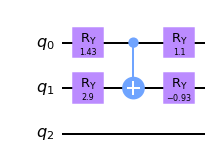

In [6]:
circuit.draw('mpl')

## Evaluating payoff function

In [7]:
circuit.barrier([0, 1, 2])

In [8]:
circuit.ry(1.47, 2)
circuit.cx(0, 2)
circuit.ry(-0.10, 2)
circuit.cx(1, 2)
circuit.ry(0.10, 2)
circuit.cx(0, 2)
circuit.ry(-0.29, 2)
circuit.cx(1, 2)

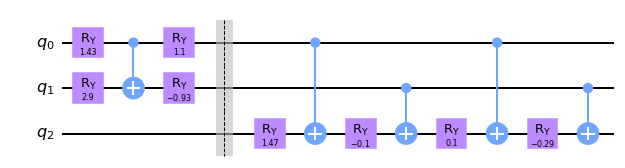

In [9]:
circuit.draw('mpl')

## Measurment

In [10]:
circuit.measure_all()

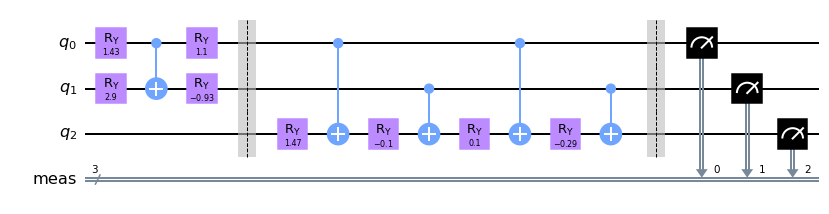

In [11]:
circuit.draw('mpl')

## Running job on simulator

In [12]:
transpiled = qiskit.transpile(circuit, backend)

In [13]:
job = backend.run(transpiled)

## Results

In [14]:
job_result = job.result()

In [15]:
counts = job_result.get_counts(circuit)

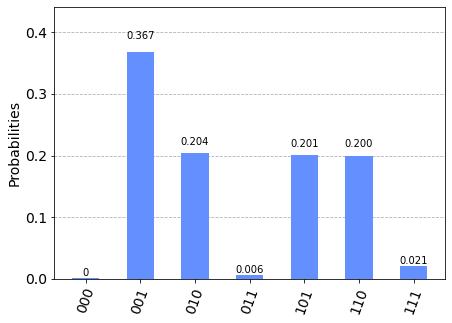

In [16]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)